REGION GROWING

Saving WhatsApp Image 2024-07-14 at 00.11.40_dff41689.jpg to WhatsApp Image 2024-07-14 at 00.11.40_dff41689.jpg
Using random seed coordinates: (553, 320)
Using random threshold: 7
Processing with seed: (553, 320) and threshold: 7


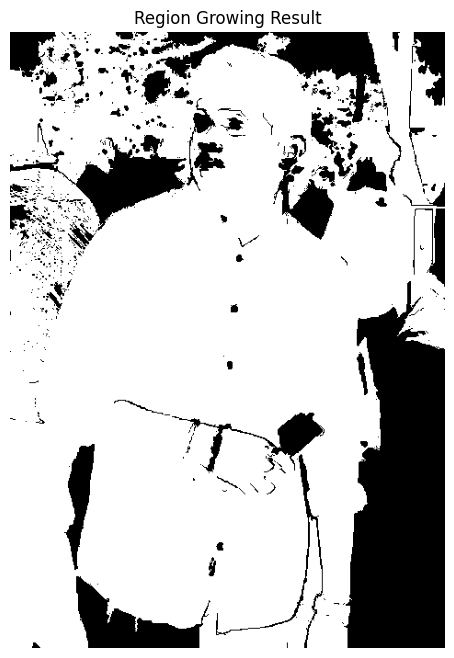

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

# Function to load an image and convert it to grayscale if necessary
def load_image(image_path):
    image = cv2.imread(image_path)
    if image is None:
        raise FileNotFoundError(f"Image file at '{image_path}' could not be found or opened.")
    if len(image.shape) == 3:
        image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        image_gray = image
    return image, image_gray

# Function to display an image
def show_image(image, title="Image"):
    plt.figure(figsize=(8, 8))
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Function to perform region growing
def region_growing(image, seed, threshold):
    height, width = image.shape
    segmented = np.zeros_like(image)
    visited = np.zeros_like(image, dtype=bool)
    stack = [seed]

    while stack:
        x, y = stack.pop()
        if x < 0 or x >= height or y < 0 or y >= width:
            continue
        if visited[x, y]:
            continue

        visited[x, y] = True
        segmented[x, y] = 255

        for dx in [-1, 0, 1]:
            for dy in [-1, 0, 1]:
                nx, ny = x + dx, y + dy
                if 0 <= nx < height and 0 <= ny < width and not visited[nx, ny]:
                    if abs(int(image[x, y]) - int(image[nx, ny])) < threshold:
                        stack.append((nx, ny))

    return segmented

# Main function to process the image for region growing
def process_image_region_growing(image_path, seed, threshold):
    try:
        image, image_gray = load_image(image_path)
    except FileNotFoundError as e:
        print(e)
        return

    print(f"Processing with seed: {seed} and threshold: {threshold}")
    segmented_image = region_growing(image_gray, seed, threshold)

    # Show the result
    show_image(segmented_image, title="Region Growing Result")

# Code to upload image file in Google Colab
from google.colab import files
uploaded = files.upload()

# Use the first uploaded image
image_path = list(uploaded.keys())[0]

# Load the image to determine its dimensions
image, image_gray = load_image(image_path)
height, width = image_gray.shape

# Generate random seed coordinates and a random threshold
seed_x = random.randint(0, height - 1)
seed_y = random.randint(0, width - 1)
threshold = random.randint(5, 10)  # Adjust the range as needed

print(f"Using random seed coordinates: ({seed_x}, {seed_y})")
print(f"Using random threshold: {threshold}")

# Process the image
process_image_region_growing(image_path, seed=(seed_x, seed_y), threshold=threshold)


REGION **MERGING**

Upload the original image.


Saving WhatsApp Image 2024-07-14 at 00.11.40_dff41689.jpg to WhatsApp Image 2024-07-14 at 00.11.40_dff41689 (11).jpg
Using random threshold: 19
Image shape: (670, 473)
Labeled image shape: (670, 473)


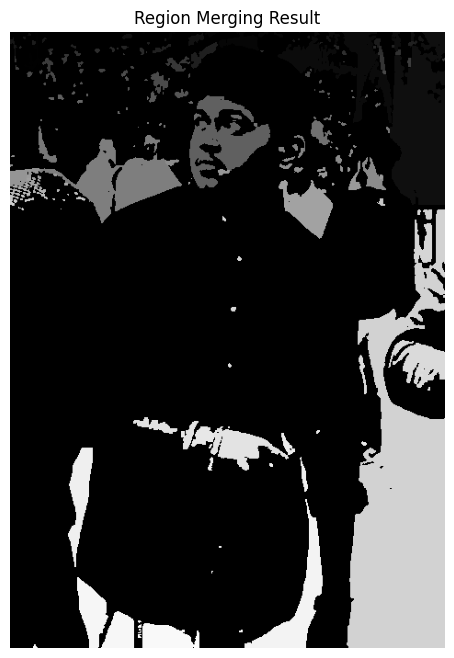

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.measure import label, regionprops
import random

# Function to load an image and convert it to grayscale if necessary
def load_image(image_path):
    image = cv2.imread(image_path)
    if image is None:
        raise FileNotFoundError(f"Image file at '{image_path}' could not be found or opened.")
    if len(image.shape) == 3:
        image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        image_gray = image
    return image, image_gray

# Function to display an image
def show_image(image, title="Image"):
    plt.figure(figsize=(8, 8))
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Function to perform initial segmentation using thresholding
def initial_segmentation(image_gray, threshold_value):
    _, initial_segments = cv2.threshold(image_gray, threshold_value, 255, cv2.THRESH_BINARY)
    return initial_segments

# Function to perform region merging
def region_merging(image, initial_segments, threshold):
    labeled_image = label(initial_segments)
    regions = regionprops(labeled_image)

    height, width = image.shape
    print(f"Image shape: {image.shape}")
    print(f"Labeled image shape: {labeled_image.shape}")

    for region in regions:
        for coord in region.coords:
            x, y = coord
            for dx in [-1, 0, 1]:
                for dy in [-1, 0, 1]:
                    nx, ny = x + dx, y + dy
                    if 0 <= nx < height and 0 <= ny < width:
                        if labeled_image[nx, ny] != labeled_image[x, y]:
                            if abs(int(image[x, y]) - int(image[nx, ny])) < threshold:
                                labeled_image[nx, ny] = labeled_image[x, y]

    return labeled_image

# Main function to process the image for region merging
def process_image_region_merging(image_path, threshold):
    try:
        image, image_gray = load_image(image_path)

        # Generate an initial segmentation using thresholding
        initial_segments = initial_segmentation(image_gray, 128)  # Using 128 as the threshold value

    except FileNotFoundError as e:
        print(e)
        return
    except ValueError as e:
        print(e)
        return

    merged_image = region_merging(image_gray, initial_segments, threshold)

    # Show the result
    show_image(merged_image, title="Region Merging Result")

# Code to upload image files in Google Colab
from google.colab import files
print("Upload the original image.")
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

# Generate a random threshold
threshold = random.randint(5, 20)  # Adjust the range as needed

print(f"Using random threshold: {threshold}")

# Process the image
process_image_region_merging(image_path, threshold)
